In [224]:
import pandas as pd

sheet=pd.read_csv("E:/Engineering/Mtech/Sem3/Datamining/Project/Group_21/Train_before.csv")
sheet.head()

,Age,workclass,education,education-num,marital,occupation,relationship,sex,capital-gain,capital loss,hours-per-week,salary
0,39.0,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,Male,2174.0,0.0,40.0,0
1,50.0,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,NaN,0.0,0.0,13.0,0
2,38.0,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,Male,0.0,NaN,40.0,0
3,53.0,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Male,0.0,0.0,40.0,0
4,28.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Female,0.0,0.0,40.0,0


In [225]:
sheet.describe(include='all')

,Age,workclass,education,education-num,marital,occupation,relationship,sex,capital-gain,capital loss,hours-per-week,salary
count,13675.000000,13758,13688,13636.000000,13695,13685,13702,13684,13696.000000,13719.000000,13720.000000,15000.000000
unique,NaN,7,16,NaN,7,14,6,2,NaN,NaN,NaN,NaN
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,Male,NaN,NaN,NaN,NaN
freq,NaN,10157,4529,NaN,6361,1814,5594,9272,NaN,NaN,NaN,NaN
mean,38.447020,NaN,NaN,10.138824,NaN,NaN,NaN,NaN,1071.730432,88.007143,40.968294,0.239200
std,13.135639,NaN,NaN,2.539547,NaN,NaN,NaN,NaN,7339.807449,402.016859,11.869799,0.426609
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,0.000000
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,0.000000
75%,47.000000,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,0.000000


There are some numeriacal and some categorical predictors in this data. Salary coloumn being the one we need to predict we first convert the coloumn into varialbles 0 or 1. This thing call be done as a first step of data analysis in our csv file itself. Now the given data as no missing 

In [226]:
pdytrain=sheet['salary']
pdxtrain=sheet.drop('salary',axis=1)
pdxtrain.head()

,Age,workclass,education,education-num,marital,occupation,relationship,sex,capital-gain,capital loss,hours-per-week
0,39.0,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,Male,2174.0,0.0,40.0
1,50.0,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,NaN,0.0,0.0,13.0
2,38.0,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,Male,0.0,NaN,40.0
3,53.0,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Male,0.0,0.0,40.0
4,28.0,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Female,0.0,0.0,40.0


Generally when we collect data in practice their are some missing values. This might me attributed to neglegence of volunteer who is collecting data for us or to miss inefficient design of experiment. Whatever the reson is we The Data Analyst have to cope up with it. There are quiet a few methods to handle it. 
If we have enough data that removal of the data points wont affect out model then we go for it.
Otherwise we replace the missing value with appropriate value mean,median or mode of the attribute. This method is called Imputation. We will replace the missing value with most frequent (mode) in case of discrete atrribute and with mean in case of continuous atrribute

In [227]:
pdxtrain.isnull().sum()

Age               1325
workclass         1242
education         1312
education-num     1364
marital           1305
occupation        1315
relationship      1298
sex               1316
capital-gain      1304
capital loss      1281
hours-per-week    1280
dtype: int64

In [274]:




from sklearn.impute import SimpleImputer

npxtrain=np.array(pdxtrain)
npytrain=np.array(pdytrain)

#for categories
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(npxtrain[:,[1,2,4,5,6,7]])
pred_categ=imp.transform(npxtrain[:,[1,2,4,5,6,7]])


#for continuos

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(npxtrain[:,[0,3,8,9,10]])
pred_int=imp.transform(npxtrain[:,[0,3,8,9,10]])

npimputedxtrain=np.c_[pred_categ,pred_int]
pdimputedxtrain=pd.DataFrame(npimputedxtrain)

pdimputedxtrain.columns =['workclass', 'education','marital status','occupation','relationship','sex','Age','education-num','capital-gain',
             'capital loss','hours-per-week']

pdimputedxtrain.describe(include='all')



,workclass,education,marital status,occupation,relationship,sex,Age,education-num,capital-gain,capital loss,hours-per-week
count,15000,15000,15000,15000,15000,15000,15000.00000,15000.0,15000.0,15000.0,15000.0
unique,7,16,7,14,6,2,72.00000,17.0,107.0,79.0,87.0
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,Male,38.44702,9.0,0.0,0.0,40.0
freq,11399,5841,7666,3129,6892,10588,1325.00000,4482.0,12563.0,13068.0,6492.0


In [262]:
npimputedxtrain=np.c_[pred_categ,pred_int]
pdimputedxtrain=pd.DataFrame(npimputedxtrain)

pdimputedxtrain.columns =['workclass', 'education','marital status','occupation','relationship','sex','Age','education-num','capital-gain',
             'capital loss','hours-per-week']

pdimputedxtrain.describe(include='all')


,workclass,education,marital status,occupation,relationship,sex,Age,education-num,capital-gain,capital loss,hours-per-week
count,15000,15000,15000,15000,15000,15000,15000.00000,15000.0,15000.0,15000.0,15000.0
unique,7,16,7,14,6,2,72.00000,17.0,107.0,79.0,87.0
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,Male,38.44702,9.0,0.0,0.0,40.0
freq,11399,5841,7666,3129,6892,10588,1325.00000,4482.0,12563.0,13068.0,6492.0


Now once we have whole set of data. We will now convert discrete data to a binary values of 0 or 1. This is called One Hot Encoding. But for categorical data we fir label encode them that is replace categories with numbers then go for one hot encoding.

In [279]:
#del pdimputedxtrain['education] # education and education number both doesn't make sence to be in a model together


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() 
  
pdimputedxtrain['workclass']= le.fit_transform(pdimputedxtrain['workclass']) 
pdimputedxtrain['education']= le.fit_transform(pdimputedxtrain['education'])
pdimputedxtrain['marital status']= le.fit_transform(pdimputedxtrain['marital status'])
pdimputedxtrain['occupation']= le.fit_transform(pdimputedxtrain['occupation'])
pdimputedxtrain['relationship']= le.fit_transform(pdimputedxtrain['relationship'])
pdimputedxtrain['sex']= le.fit_transform(pdimputedxtrain['sex'])




pdimputedxtrain=pdimputedxtrain.drop(['education'],axis=1)
pdimputedxtrain.head()

,workclass,marital status,occupation,relationship,sex,Age,education-num,capital-gain,capital loss,hours-per-week,salary
0,5,4,0,1,1,39,13,2174,0,40,0
1,4,2,3,0,1,50,13,0,0,13,0
2,2,0,5,1,1,38,9,0,88.0071,40,0
3,2,2,5,0,1,53,7,0,0,40,0
4,2,2,9,5,0,28,13,0,0,40,0


,workclass,marital status,occupation,relationship,sex,Age,education-num,capital-gain,capital loss,hours-per-week,salary
0,5,4,0,1,1,39,13,2174,0,40,0
1,4,2,3,0,1,50,13,0,0,13,0
2,2,0,5,1,1,38,9,0,88.0071,40,0
3,2,2,5,0,1,53,7,0,0,40,0
4,2,2,9,5,0,28,13,0,0,40,0


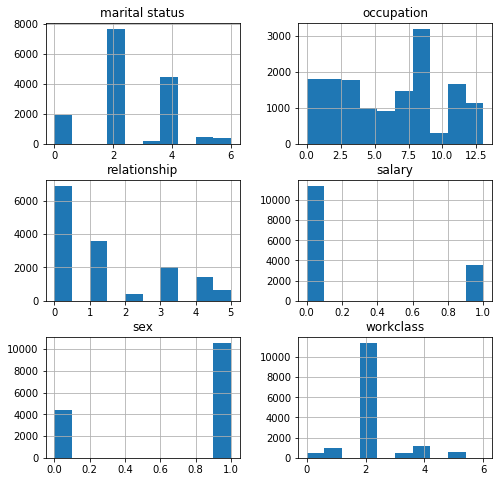

In [280]:
#visualization
pdimputedxtrain['salary']=pdytrain

pdimputedxtrain.hist(figsize=(8,8))
pdimputedxtrain.head()

In [281]:
onehotencoder = OneHotEncoder(categorical_features = [0,1,2,3,4])
npOneHotencoded = onehotencoder.fit_transform(pdimputedxtrain).toarray()
pdOneHotencoded=pd.DataFrame(npOneHotencoded)
pdOneHotencoded.describe()

C:\Users\prem\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\prem\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
count,15000.00000,15000.0000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.02880,0.0618,0.759933,0.032533,0.076533,0.040133,0.000267,0.129200,0.000733,0.511067,...,0.095667,0.044733,0.294133,0.705867,38.44702,10.138824,1071.730432,88.007143,40.968294,0.239200
std,0.16725,0.2408,0.427138,0.177418,0.265858,0.196278,0.016328,0.335432,0.027071,0.499894,...,0.294143,0.206725,0.455667,0.455667,12.54203,2.421323,7013.495660,384.466507,11.352028,0.426609
min,0.00000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,17.00000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,0.00000,0.0000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,29.00000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,0.00000,0.0000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,38.44702,10.000000,0.000000,0.000000,40.000000,0.000000
75%,0.00000,0.0000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,1.000000,46.00000,12.000000,0.000000,0.000000,45.000000,0.000000
max,1.00000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,90.00000,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [266]:
pdOneHotencoded.columns =['Federal-gov', 'Local-gov', 'Private', 'Self-emp-not-inc','State-gov','Self-emp-inc','Without-pay','Married-AF-spouse','Married-civ-spouse','Married-spouse-absent',
             'Divorced','Never-married','Separated','Widowed','cater','Adm-clerical',' Armed-Forces',' Exec-managerial',
             'Farming-fishing','Handlers-cleaners','Machine-op-inspct','Other-service','Priv-house-serv',' Prof-specialty',
             'Protective-serv','Sales',' Tech-support','Transport-moving','Husband','Not-in-family','Other-relative','Own-child',
             'Unmarried','Wife','Female','Male','Age','education-num','capital-gain','capital-loss', 'hours-per-week','salary']


In [267]:


del pdOneHotencoded['Without-pay']
del pdOneHotencoded['Married-AF-spouse']
del pdOneHotencoded['Married-spouse-absent']
del pdOneHotencoded[' Armed-Forces']
del pdOneHotencoded['Priv-house-serv']
del pdOneHotencoded['Wife']
del pdOneHotencoded['Other-relative']
del pdOneHotencoded['Widowed']
del pdOneHotencoded['Separated']
del pdOneHotencoded['Federal-gov']
del pdOneHotencoded['Married-civ-spouse']
del pdOneHotencoded['Local-gov']
del pdOneHotencoded['Adm-clerical']

Now we have a complete dataset which we will can use to train a model. Though there are many models we can fit. Lets go for Logistic regression and learn how to analyse the result 

In [243]:
from sklearn.linear_model import LogisticRegression
xtrain=pdOneHotencoded.drop(['salary'],axis=1)
ytrain=pdOneHotencoded['salary']
clf = LogisticRegression(random_state=0).fit(xtrain, ytrain)

C:\Users\prem\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [248]:
pred_ytrain=clf.predict(xtrain)

In [249]:
from sklearn.metrics import accuracy_score
accuracy_score(ytrain,pred_ytrain)

0.7608

Text(33.0, 0.5, 'Actual classes')

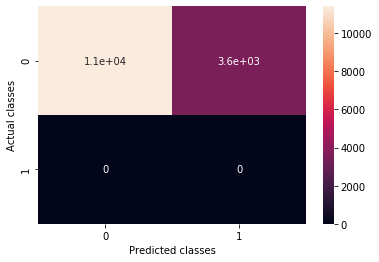

In [254]:
from sklearn.metrics import confusion_matrix




confusion_matrix(ytrain,pred_ytrain).ravel()


cfm = confusion_matrix(pred_ytrain,ytrain)
sns.heatmap(cfm, annot=True)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

area under the curve 0.5253750062032534
Accuracy 0.7608


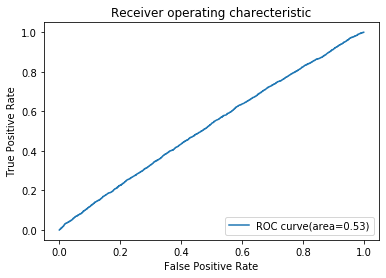

In [252]:
from sklearn.metrics import roc_curve, auc 

pred_test_log_prob=clf.predict_proba(xtrain)

fpr,tpr,_= roc_curve(ytrain,pred_test_log_prob[:,1])
roc_auc=auc(fpr,tpr)
print('area under the curve',roc_auc)
print('Accuracy',accuracy_score(ytrain,pred_ytrain))
plt.plot(fpr,tpr,label='ROC curve(area=%0.2f)' %roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating charecteristic')
plt.legend(loc="lower right")
plt.show()

As we see our model is not performing well. Accuracy is just 0.76. Now we need to debug this. First anf foremost thing to check if there is any collinearity between the attributes with is disurbing the model

                     Age  education-num  capital-gain  capital-loss  \
Age             1.000000       0.033950      0.065124      0.053972   
education-num   0.033950       1.000000      0.107166      0.074037   
capital-gain    0.065124       0.107166      1.000000     -0.029220   
capital-loss    0.053972       0.074037     -0.029220      1.000000   
hours-per-week  0.084824       0.141830      0.058973      0.051094   
salary          0.013060       0.008804      0.008011     -0.003791   

                hours-per-week    salary  
Age                   0.084824  0.013060  
education-num         0.141830  0.008804  
capital-gain          0.058973  0.008011  
capital-loss          0.051094 -0.003791  
hours-per-week        1.000000  0.000886  
salary                0.000886  1.000000  


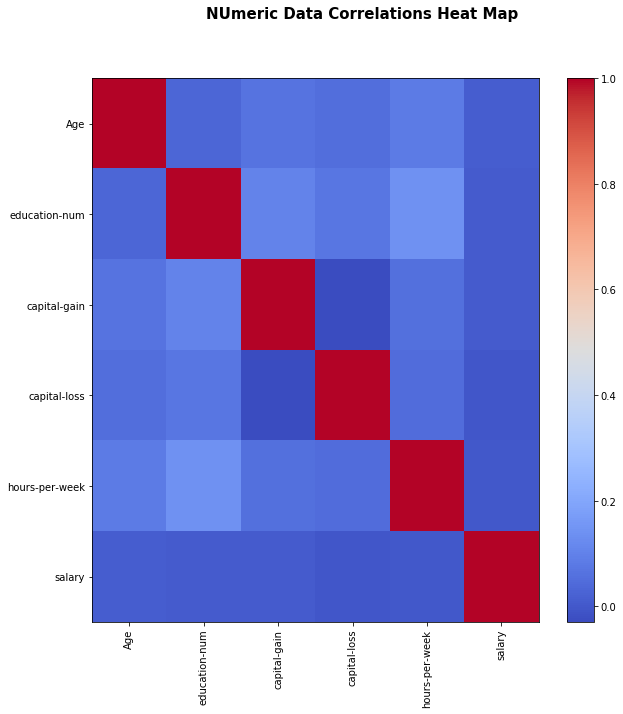

In [268]:

corr=pdOneHotencoded[['Age','education-num','capital-gain','capital-loss','hours-per-week','salary']].corr(method='pearson')
print(corr)
#print(cor_df.corr(method='pearson').style.background_gradient(cmap='coolwarm'))
plt.figure(figsize=(10, 10))
plt.imshow(corr, cmap='coolwarm', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('NUmeric Data Correlations Heat Map', fontsize=15, fontweight='bold')
plt.show()


It seems there isn't any corelation. Their's one more thing which needs to be checked Variation Inflation Factor

In [271]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
Cont= pd.DataFrame()
cont=pdOneHotencoded[['Age','education-num','capital-loss','hours-per-week','capital-gain']]
vif["VIF Factor"] = [variance_inflation_factor(cont.values, i) for i in range(cont.shape[1])]
vif["features"] = cont.columns

print(vif)

   VIF Factor        features
0    8.325379             Age
1   11.765485   education-num
2    1.060456    capital-loss
3   11.142515  hours-per-week
4    1.031922    capital-gain


VIF should be as low as possible. typically more than 10 is not acceptable

In [272]:
del pdOneHotencoded['Age']
del pdOneHotencoded['education-num']
del pdOneHotencoded['capital-loss']
del pdOneHotencoded['hours-per-week']
del pdOneHotencoded['capital-gain']